In [135]:
import pandas as pd
import numpy as np
import math
from wdmtoolbox import wdmtoolbox 
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime   
from dateutil import relativedelta
import numpy.polynomial.polynomial as poly
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
from functools import reduce
from PIL import Image
from itertools import islice
import csv
import matplotlib.dates as mdates
from pandas import ExcelWriter
from pandas import ExcelFile
import os
from matplotlib import rc
import matplotlib.ticker as mtick         
# center all the figures and tables throughout the report
from IPython.display import display, HTML
display(HTML("""<style>.output {
    display: flex;
    align-items: center;
    text-align: center;}</style> """))
print (' All libraries, tools, and functions have been succesfully uploaded  ')

 All libraries, tools, and functions have been succesfully uploaded  


In [6]:
def read_file(file_path):
    base_directory = os.getcwd()
    # give the file path from the base directory 
    data = base_directory+ str(file_path)
    return pd.read_excel(data, engine = 'openpyxl')


# Import data

In [84]:
def temp(df_history,feature,cs,sign,inflection):
    if sign == 'leq':
        for i in cs :
            true_pred = df_history[(df_history[feature] >= inflection) & (df_history['SF$[m^3/s]$']<(cs[i]))]['SF$[m^3/s]$'].count()
            total_cases = df_history[(df_history[feature]>= inflection)]['SF$[m^3/s]$'].count()
            print("Probability of "+ str(i)+": {}".format(np.round((100 * true_pred/total_cases),1)))
    else:
        for i in cs :
            true_pred = df_history[(df_history[feature]<inflection) & (df_history['SF$[m^3/s]$']<(cs[i]))]['SF$[m^3/s]$'].count()
            total_cases = df_history[(df_history[feature]<inflection)]['SF$[m^3/s]$'].count()
            print("Probability of "+ str(i)+": {}".format(np.round((100 * true_pred/total_cases),1)))
        
    

## ExtraTree

In [7]:
Historical_path = '/Extratree_tuned/df_AI_Spring.xlsx'
df_history = read_file(Historical_path)
#Load the RCP45 dataframe
RCP_45 = '/Extratree_tuned/RCP45/df_future.xlsx'
df_RCP45 = read_file(RCP_45)
#Load the RCP85 dataframe
RCP_85 = '/Extratree_tuned/RCP45/df_future.xlsx'
df_RCP85 = read_file(RCP_85)


In [88]:
list(df_history.columns)

['DATE',
 '$T_{min}$ [$^oC$]',
 '$T_{max}$ [$^oC$]',
 '$P$ [mm]',
 'SF$[m^3/s]$',
 'Month',
 '$T_{max}^{lag1}$ [$^oC$]',
 '$T_{max}^{lag2}$ [$^oC$]',
 '$T_{min}^{lag1}$ [$^oC$]',
 '$T_{min}^{lag2}$ [$^oC$]',
 '$P^{lag1}$ [mm]',
 '$P^{lag2}$ [mm]',
 'SF$^{lag1} [m^3/s]$',
 'SF$^{lag2} [m^3/s]$']

In [137]:
'/home/c0d3b23ak32/Desktop/XAI/Springs/San'

'/home/c0d3b23ak32/Desktop/XAI/Springs/San_marco'

# Comal

In [52]:
cfs_to_m3  = 0.028316847

cs1 = 225 * cfs_to_m3      # 225 # ft
cs2 = 200 * cfs_to_m3      # 200 # ft 
cs3 = 150 * cfs_to_m3      # 150 # ft
cs4 = 100 * cfs_to_m3      # 100 # ft
cs5 = 45  * cfs_to_m3      # 45  # ft

cs_levels =dict(zip(['CS1','CS2','CS3','CS4','CS5'],np.round([cs1,cs2,cs3,cs4,cs5],2)))


Probability of CS2 : 80.1


In [89]:
temp(df_history,'$T_{max}$ [$^oC$]',cs_levels, 'leq', 30)

Probability of CS1: 80.0
Probability of CS2: 67.0
Probability of CS3: 41.8
Probability of CS4: 9.9
Probability of CS5: 0.0


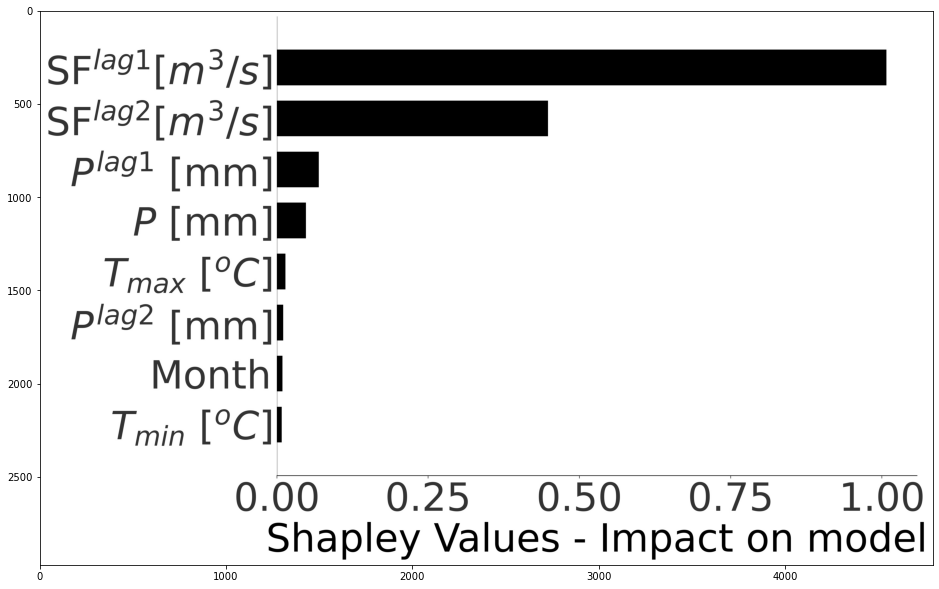

In [133]:
# load and show an image with Pillow
from PIL import Image
import matplotlib.pyplot as plt
# load the image
image = Image.open(os.getcwd()+'/Extratree_tuned/Features_importance/Feature Importances- Hist.jpg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(16,12))

imgplot = plt.imshow(image)
